# Regresión
## Regresión Lineal

In [1]:
import pandas as pd
import numpy as np

In [2]:
df_publicidad = pd.read_csv("datasets/ads/Advertising.csv")

In [3]:
df_publicidad.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [4]:
df_publicidad.shape

(200, 4)

In [5]:
import seaborn as sb

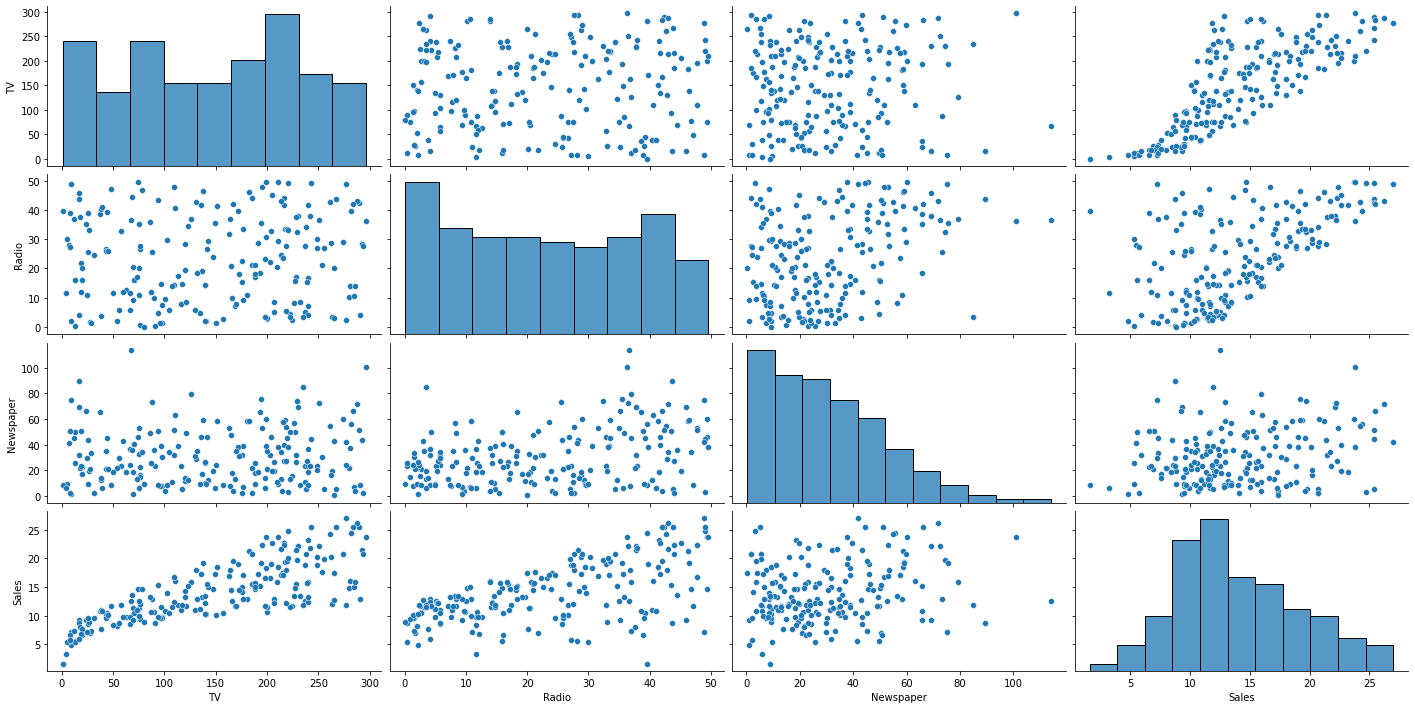

In [6]:
sb.pairplot(df_publicidad, aspect = 2)

In [7]:
import statsmodels.formula.api as reg

In [8]:
modelo1 = reg.ols(formula="Sales~TV", data = df_publicidad).fit()

In [9]:
modelo1.params

Intercept    7.032594
TV           0.047537
dtype: float64

In [10]:
modelo1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Wed, 05 May 2021   Prob (F-statistic):           1.47e-42
Time:                        12:04:33   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.0326      0.458     15.360      0.000       6.130       7.935
TV             0.0475      0.003     17.668      0.000       0.042       0.053
==============================================================================
Omnibus:                        0.531   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.669
Skew:                          -0.089   Prob(JB):                        0.716
Kurtosis:                       2.779   Cond. No.                         338.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [11]:
modelo1.rsquared

0.611875050850071

In [12]:
prediccion = modelo1.predict(pd.DataFrame(df_publicidad["TV"]))

In [13]:
prediccion[:10]

0    17.970775
1     9.147974
2     7.850224
3    14.234395
4    15.627218
5     7.446162
6     9.765950
7    12.746498
8     7.441409
9    16.530414
dtype: float64

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline

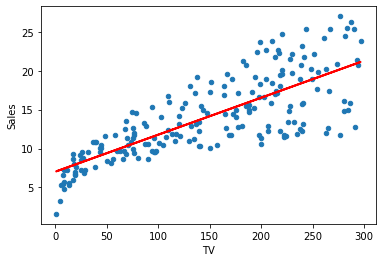

In [17]:
df_publicidad.plot(kind = "scatter", x = "TV", y ="Sales")
plt.plot(pd.DataFrame(df_publicidad["TV"]), prediccion, c="red", linewidth = 2)

In [18]:
df_publicidad["pred"] = modelo1.predict(pd.DataFrame(df_publicidad["TV"]))

In [19]:
df_publicidad["error"] = df_publicidad.Sales - df_publicidad.pred

In [20]:
df_publicidad.head()

,TV,Radio,Newspaper,Sales,pred,error
0,230.1,37.8,69.2,22.1,17.970775,4.129225
1,44.5,39.3,45.1,10.4,9.147974,1.252026
2,17.2,45.9,69.3,9.3,7.850224,1.449776
3,151.5,41.3,58.5,18.5,14.234395,4.265605
4,180.8,10.8,58.4,12.9,15.627218,-2.727218


<AxesSubplot:xlabel='pred', ylabel='Sales'>

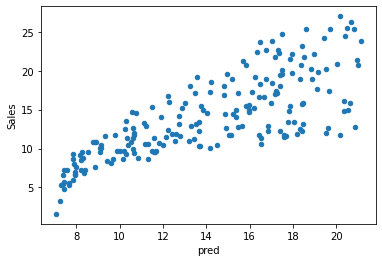

In [21]:
df_publicidad.plot(kind = "scatter", x = "pred", y ="Sales")

In [22]:
ECM = (df_publicidad["error"]**2).mean()
ECM

10.512652915656751

In [23]:
RSM = ECM**0.5
RSM

3.242322148654688

In [24]:
vent_prom = df_publicidad.Sales.mean()
vent_prom

14.022500000000003

In [25]:
var_por = RSM/vent_prom
var_por

0.2312228310682608

(array([ 4., 10., 13., 17., 40., 42., 33., 16., 17.,  8.]),
 array([-8.38598196, -6.82614689, -5.26631183, -3.70647677, -2.14664171,
        -0.58680664,  0.97302842,  2.53286348,  4.09269854,  5.65253361,
         7.21236867]),
 <BarContainer object of 10 artists>)

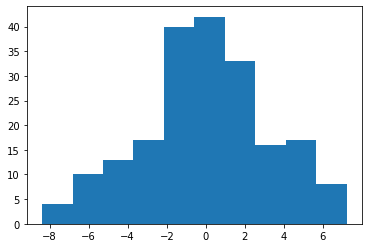

In [26]:
plt.hist(df_publicidad.error)

# Regresión lineal múltiple en Python
## El paquete statsmodel para regresión múltiple
* Sales ~TV
* Sales ~Newspaper
* Sales ~Radio
* Sales ~TV+Newspaper
* Sales ~TV+Radio
* Sales ~Newspaper+Radio
* Sales ~TV+Newspaper+Radio

In [27]:
#Añadir el Newspaper al modelo existente
modelo2 = reg.ols(formula="Sales~TV+Newspaper", data = df_publicidad).fit()

In [28]:
modelo2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.646
Model:                            OLS   Adj. R-squared:                  0.642
Method:                 Least Squares   F-statistic:                     179.6
Date:                Wed, 05 May 2021   Prob (F-statistic):           3.95e-45
Time:                        12:05:28   Log-Likelihood:                -509.89
No. Observations:                 200   AIC:                             1026.
Df Residuals:                     197   BIC:                             1036.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.7749      0.525     10.993      0.000       4.739       6.811
TV             0.0469      0.003     18.173      0.000       0.042       0.052
Newspaper      0.0442      0.010      4.346      0.000       0.024       0.064
==============================================================================
Omnibus:                        0.658   Durbin-Watson:                   1.969
Prob(Omnibus):                  0.720   Jarque-Bera (JB):                0.415
Skew:                          -0.093   Prob(JB):                        0.813
Kurtosis:                       3.122   Cond. No.                         410.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [29]:
ECM = ((df_publicidad.Sales -  modelo2.predict(df_publicidad[["TV", "Newspaper"]]))**2).mean()
ECM

9.592809059484138

In [30]:
RSM = ECM**0.5
RSM

3.0972260265411915

In [31]:
vent_prom = df_publicidad.Sales.mean()

In [32]:
var_por = RSM/vent_prom
var_por

0.22087545206212808

In [33]:
#Añadir la Radio al modelo existente
modelo3 = reg.ols(formula="Sales~TV+Radio", data = df_publicidad).fit()

In [34]:
modelo3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     859.6
Date:                Wed, 05 May 2021   Prob (F-statistic):           4.83e-98
Time:                        12:05:29   Log-Likelihood:                -386.20
No. Observations:                 200   AIC:                             778.4
Df Residuals:                     197   BIC:                             788.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9211      0.294      9.919      0.000       2.340       3.502
TV             0.0458      0.001     32.909      0.000       0.043       0.048
Radio          0.1880      0.008     23.382      0.000       0.172       0.204
==============================================================================
Omnibus:                       60.022   Durbin-Watson:                   2.081
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              148.679
Skew:                          -1.323   Prob(JB):                     5.19e-33
Kurtosis:                       6.292   Cond. No.                         425.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [35]:
ECM = ((df_publicidad.Sales -  modelo3.predict(df_publicidad[["TV", "Radio"]]))**2).mean()
ECM

2.7845699003380924

In [36]:
RSM = ECM**0.5
RSM

1.6687030593661931

In [37]:
var_por = RSM/vent_prom
var_por

0.11900182273961082

In [38]:
#Añadir la Radio al modelo existente
modelo4 = reg.ols(formula="Sales~TV+Radio+Newspaper", data = df_publicidad).fit()

In [39]:
modelo4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Wed, 05 May 2021   Prob (F-statistic):           1.58e-96
Time:                        12:05:31   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.000       2.324       3.554
TV             0.0458      0.001     32.809      0.000       0.043       0.049
Radio          0.1885      0.009     21.893      0.000       0.172       0.206
Newspaper     -0.0010      0.006     -0.177      0.860      -0.013       0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [40]:
ECM = ((df_publicidad.Sales -  modelo4.predict(df_publicidad))**2).mean()
ECM

2.7841263145109347

In [41]:
RSM = ECM**0.5
RSM

1.6685701407225693

In [42]:
var_por = RSM/vent_prom
var_por

0.11899234378481505

## Multicolinealidad 
#### Factor Inflación de la Varianza
* VIF = 1 : Las variables no están correlacionadas
* VIF < 5 : Las variables tienen una correlación moderada y se pueden quedar en el modelo
* VIF >5 : Las variables están altamente correlacionadas y deben desaparecer del modelo.

<AxesSubplot:>

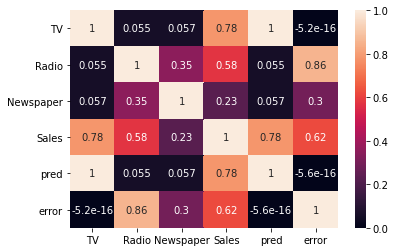

In [43]:
sb.heatmap(df_publicidad.corr(), annot=True)

In [44]:
# Newspaper ~ TV + Radio -> R^2 VIF = 1/(1-R^2)
lm_n = reg.ols(formula="Newspaper~TV+Radio", data = df_publicidad).fit()
rsquared_n = lm_n.rsquared
VIF = 1/(1-rsquared_n)
VIF

1.1451873787239286

In [45]:
# TV ~ Newspaper + Radio -> R^2 VIF = 1/(1-R^2)
lm_tv = reg.ols(formula="TV~Newspaper+Radio", data=df_publicidad).fit()
rsquared_tv = lm_tv.rsquared
VIF = 1/(1-rsquared_tv)
VIF

1.0046107849396502

In [46]:
# Radio ~ TV + Newspaper -> R^2 VIF = 1/(1-R^2)
lm_r = reg.ols(formula="Radio~Newspaper+TV", data=df_publicidad).fit()
rsquared_r = lm_r.rsquared
VIF = 1/(1-rsquared_r)
VIF

1.1449519171055353

Al momento de medir el ajuste del modelo no es bueno hacerlo sobre el mismo conjunto de datos con los cuales se entreno, por lo cual es necesario dividir el data set en datos de entrenamiento y de prueba o validación.

# Dividir el dataset en conjunto de entrenamiento y de testing

In [47]:
df_publicidad.head()

,TV,Radio,Newspaper,Sales,pred,error
0,230.1,37.8,69.2,22.1,17.970775,4.129225
1,44.5,39.3,45.1,10.4,9.147974,1.252026
2,17.2,45.9,69.3,9.3,7.850224,1.449776
3,151.5,41.3,58.5,18.5,14.234395,4.265605
4,180.8,10.8,58.4,12.9,15.627218,-2.727218


In [48]:
a = np.random.randn(len(df_publicidad))

(array([ 6., 10., 30., 40., 44., 32., 26.,  9.,  2.,  1.]),
 array([-2.29954691, -1.76770729, -1.23586768, -0.70402806, -0.17218845,
         0.35965116,  0.89149078,  1.42333039,  1.95517001,  2.48700962,
         3.01884924]),
 <BarContainer object of 10 artists>)

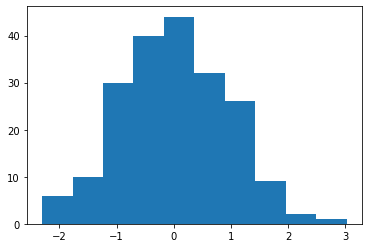

In [49]:
plt.hist(a)

In [50]:
(a<0.8)

array([ True, False, False,  True,  True, False,  True,  True,  True,
        True,  True, False,  True,  True,  True, False,  True,  True,
        True,  True, False,  True, False, False, False,  True,  True,
       False, False,  True,  True,  True, False,  True,  True,  True,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False,  True,  True,  True, False,  True, False,
        True,  True,  True, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
       False, False,  True, False,  True,  True,  True,  True,  True,
       False,  True,  True, False,  True,  True,  True, False,  True,
       False, False,  True,  True, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False,  True,  True, False,  True,  True,  True,  True,
       False,  True,

In [51]:
indice = (a<0.8)

In [52]:
df_train = df_publicidad[indice]
df_test = df_publicidad[~indice]

In [53]:
len(df_train), len(df_test)

(155, 45)

In [54]:
import statsmodels.formula.api as reg
lm = reg.ols(formula="Sales~TV+Radio", data=df_train).fit()

In [55]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.902
Method:                 Least Squares   F-statistic:                     711.4
Date:                Wed, 05 May 2021   Prob (F-statistic):           6.76e-78
Time:                        12:05:35   Log-Likelihood:                -293.07
No. Observations:                 155   AIC:                             592.1
Df Residuals:                     152   BIC:                             601.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.2060      0.321      9.981      0.000       2.571       3.841
TV             0.0439      0.002     28.269      0.000       0.041       0.047
Radio          0.1926      0.009     21.584      0.000       0.175       0.210
==============================================================================
Omnibus:                       73.580   Durbin-Watson:                   1.958
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              326.828
Skew:                          -1.734   Prob(JB):                     1.07e-71
Kurtosis:                       9.211   Cond. No.                         429.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Validación del modelo con el df test

In [56]:
sales_pred = lm.predict(df_test)
sales_pred

1      12.728332
2      12.801314
5      13.006056
11     17.251543
15     20.969121
20     18.126558
22      6.847720
23     16.480973
24      8.367115
27     16.960350
28     19.345241
32      7.760989
36     23.356083
46      9.049667
56      8.938506
60      5.939314
62     16.694117
66      9.326530
81     14.520408
82     10.420709
84     20.858297
90     10.044137
93     21.247861
97     15.365829
99     17.171361
100    13.795249
103    14.765613
118    15.829924
121     8.210588
126    11.040543
128    22.312354
131    15.404082
141    18.525515
143     8.894697
145     9.729671
148    12.635650
153    18.370573
155     5.620139
156    15.705403
158    10.826510
164    11.181116
165    14.152972
172     7.937538
179    12.400147
199    15.049163
dtype: float64

In [57]:
ECM = ((df_test.Sales - sales_pred)**2).mean()
ECM

3.715908278265736

In [58]:
RSM = ECM**0.5
RSM

1.927669130910628

In [59]:
sales_mean = np.mean(df_test["Sales"])
var_er = RSM/sales_mean
var_er

0.14642996436694514

In [60]:
df_test["sales_pred"] = sales_pred

<ipython-input-60-9e53983a111d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test["sales_pred"] = sales_pred


In [61]:
df_test["error"]=df_test.Sales - sales_pred

<ipython-input-61-a842e6c85362>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test["error"]=df_test.Sales - sales_pred


array([[<AxesSubplot:title={'center':'error'}>]], dtype=object)

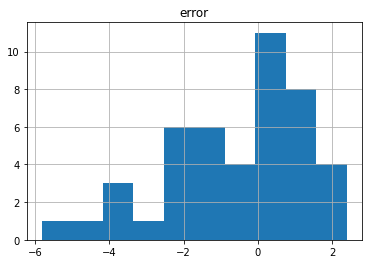

In [62]:
df_test.hist("error")

In [63]:
df_test["error"].mean()

-0.5236794334913084

<AxesSubplot:xlabel='sales_pred', ylabel='Sales'>

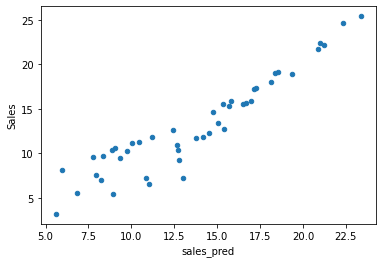

In [64]:
%matplotlib inline
df_test.plot(kind = "scatter", x = "sales_pred", y ="Sales")


# Regresión lineal en Python
## El paquete scikit-learn para regresión lineal y la selección de rasgos

In [65]:
from sklearn.feature_selection import RFE
from sklearn.svm import SVR
import pandas as pd
import numpy as np

In [66]:
df_publicidad = pd.read_csv("datasets/ads/Advertising.csv")

In [67]:
x = df_publicidad[["TV", "Radio", "Newspaper"]]
y = df_publicidad["Sales"]

In [68]:
x.shape, y.shape

((200, 3), (200,))

In [69]:
X = df_publicidad.drop("Sales", axis=1)
Y = df_publicidad["Sales"]

In [70]:
x.shape, y.shape

((200, 3), (200,))

In [71]:
estimator = SVR(kernel="linear")
selector = RFE(estimator, 2, step=1)
selector = selector.fit(X,Y)

C:\Users\LCM\Anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass n_features_to_select=2 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


In [72]:
selector.support_

array([ True,  True, False])

In [73]:
selector.ranking_

array([1, 1, 2])

In [74]:
from sklearn.linear_model import LinearRegression

In [75]:
df_publicidad.drop("Sales", axis=1).columns[selector.support_]

Index(['TV', 'Radio'], dtype='object')

In [76]:
X_pred = X[["TV", "Radio"]]

In [77]:
lm = LinearRegression()
lm.fit(X_pred, Y)

LinearRegression()

In [78]:
lm.intercept_

2.9210999124051362

In [79]:
lm.coef_

array([0.04575482, 0.18799423])

In [80]:
lm.score(X_pred, Y)

0.8971942610828956

In [81]:
lm.predict(X_pred)[:10]

array([20.55546463, 12.34536229, 12.33701773, 17.61711596, 13.22390813,
       12.51208449, 11.71821241, 12.10551553,  3.7093792 , 12.55169696])

In [82]:
df_publicidad["pred"] = lm.predict(X_pred)

<AxesSubplot:xlabel='Sales', ylabel='pred'>

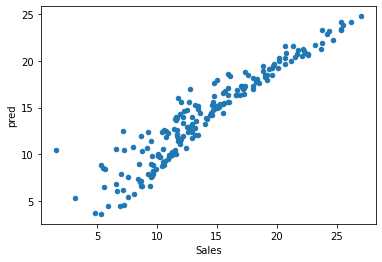

In [83]:
df_publicidad.plot(kind = "scatter", x = "Sales", y = "pred")